<a href="https://colab.research.google.com/github/yum-cloud-94/Hotel-Booking-Cancelation-Prediction/blob/master/Hotel_Booking_Cancelation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Cancelation Prediction

### 변수 설명


*   hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)
*   is_canceled : Value indicating if the booking was canceled (1) or not (0)
*   lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
*   arrival_date_year : Year of arrival date
*   arrival_date_month : Month of arrival date
*   arrival_date_week_number : Week number of year for arrival date
*   arrival_date_day_of_month : Day of arrival date
*   stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
*   adults : Number of adults
*   children : Number of children
*   babies : Number of babies
*   meal : Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
*   country : Country of origin. Categories are represented in the ISO 3155–3:2013 format
*   market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   is_repeated_guestValue : indicating if the booking name was from a repeated guest (1) or not (0)
*   previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
*   previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
*   reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
*   assigned_room_type : Code for the type of room assigned to the booking.
*   booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
*   deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
*   agent : ID of the travel agency that made the booking
*   company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
*   days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
*   customer_type : Type of booking, assuming one of four categories(Contract,Group,Transient,Transient-party)
*   adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
*   required_car_parking_spaces : Number of car parking spaces required by the customer
*   total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
*   reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
*   reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### Data Road

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import time
import datetime

from datetime import timedelta
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# 랜덤포레스트 
from sklearn.ensemble import RandomForestClassifier
# 반복적 변수 제거 방식
from sklearn.feature_selection import RFE
# xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn import tree

## 분류 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.tools.eval_measures import rmse

import xgboost as xgb

# lgbm
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
hotel = pd.read_csv("/content/drive/My Drive/SNU 빅데이터 핀테크/데이터사이언스/개인과제/hotel_bookings.csv/hotel_bookings.csv")

### EDA

In [ ]:
hotel.head()
hotel.shape

(119390, 32)

In [ ]:
# 연속형 변수 확인
print("연속형 변수 : ", hotel.describe().columns)

# 범주형 변수 확인
print("범주형 변수 : ", hotel.describe(include='object').columns)


연속형 변수 :  Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
범주형 변수 :  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# company, agent 변수에 결측 많음 => column 삭제되나 확인
# children, country 결측 삭제 확인
hotel.isna().sum()

In [ ]:
hotel["is_canceled"].unique()
hotel["is_canceled"].value_counts()

#hotel["is_canceled"].values

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
hotel.head(5)
# int -> object : is_canceled, arrival_date_year, 
# object -> int 


### Data Cleaning

##### 결측치 삭제

In [ ]:
# company, agent 변수는 결측치가 너무 많아서 변수 drop
hotel.drop('company', axis=1, inplace=True)
hotel.drop('agent', axis=1, inplace=True)
hotel.shape

(119390, 30)

In [ ]:
# children-> 4개 , country-> 488개
hotel['country'].isna().sum()
hotel[hotel['country'].isna()]
hotel['country'].value_counts()

hotel.dropna(inplace=True)
#hotel[['country','children']].dropna()
#hotel.shape

In [ ]:
# index 다시 설정
hotel.reset_index(drop=True,inplace=True)

##### int-> object

##### 파생변수 생성

In [ ]:
# 파생변수 생성 : stay_in_weekend_nights + stays_in_week_nights = stay_nights
# 파생변수 생성 : adults+children+babies = sum_customer
# 파생변수 생성 : previous_cancellations + previous_bookings_not_canceled + 1 = booking_counts
hotel['stay_nights']=hotel['stays_in_week_nights']+hotel['stays_in_weekend_nights']
hotel['sum_customer'] = hotel['adults']+hotel['children']+hotel['babies']
hotel['booking_counts'] = hotel['previous_cancellations']+hotel['previous_bookings_not_canceled']+1

hotel.shape

(118898, 33)

In [ ]:
# 1월 ~ 12월을 숫자로 변경
hotel['arrival_date_month'].value_counts()

hotel.loc[hotel['arrival_date_month']=='January', 'arrival_date_month'] = '01'
hotel.loc[hotel['arrival_date_month']=='February', 'arrival_date_month'] = '02'
hotel.loc[hotel['arrival_date_month']=='March', 'arrival_date_month'] = '03'
hotel.loc[hotel['arrival_date_month']=='April', 'arrival_date_month'] = '04'
hotel.loc[hotel['arrival_date_month']=='May', 'arrival_date_month'] = '05'
hotel.loc[hotel['arrival_date_month']=='June', 'arrival_date_month'] = '06'
hotel.loc[hotel['arrival_date_month']=='July', 'arrival_date_month'] = '07'
hotel.loc[hotel['arrival_date_month']=='August', 'arrival_date_month'] = '08'
hotel.loc[hotel['arrival_date_month']=='September', 'arrival_date_month'] = '09'
hotel.loc[hotel['arrival_date_month']=='October', 'arrival_date_month'] = '10'
hotel.loc[hotel['arrival_date_month']=='November', 'arrival_date_month'] = '11'
hotel.loc[hotel['arrival_date_month']=='December', 'arrival_date_month'] = '12'

hotel['arrival_date_month'].value_counts()

# 도착 연도, 월, 일 문자형으로 변경
hotel['arrival_date_year']=hotel['arrival_date_year'].astype(str)
hotel['arrival_date_day_of_month']=hotel['arrival_date_day_of_month'].astype(str)
hotel['arrival_date_month']=hotel['arrival_date_month'].astype(str)

In [ ]:
# 파생변수 생성 : arrival_status_date
# arrival_date_year,	arrival_date_month,	arrival_date_day_of_month
hotel['arrival_status_date'] = hotel['arrival_date_year']+"-"+hotel['arrival_date_month']+"-"+hotel['arrival_date_day_of_month']
hotel['arrival_status_date']
hotel.shape

(118898, 34)

In [ ]:
hotel['is_canceled']=hotel['is_canceled'].astype(str)
hotel['is_canceled'].value_counts()

# 한번 이상 왔으면 1, 처음이면 0 => object
hotel['is_repeated_guest']=hotel['is_repeated_guest'].astype(str)

In [ ]:
hotel['reservation_status'].value_counts()

Check-Out    74745
Canceled     42950
No-Show       1203
Name: reservation_status, dtype: int64

In [ ]:
# datetime으로 변환
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
hotel['arrival_status_date']= pd.to_datetime(hotel['arrival_status_date'])

# 파생변수 생성 : 다음 예약까지 남은 일수 reservation_status_date-arrival_status_date = next_reservation_days
hotel['next_reservation_days']= hotel['reservation_status_date']-hotel['arrival_status_date']
hotel['next_reservation_days']=hotel['next_reservation_days'].astype(str)
#hotel['next_reservation_days']

# 숫자만 떼는거 성공!
hotel['next_reservation_days']=hotel['next_reservation_days'].str.split(n=1, expand=True)
hotel['next_reservation_days']=pd.to_numeric(hotel['next_reservation_days'])
#hotel['next_reservation_days']

In [ ]:
hotel['arrival_status_date'] = hotel['arrival_status_date'].astype(str)
hotel['reservation_status_date'] = hotel['reservation_status_date'].astype(str)

In [ ]:
# 파생변수 생성 - 'reserved_room_type'== 'assigned_room_type' => same_room (같으면 1, 다르면 0)

hotel['same_room']='1'

for i in range(len(hotel)):
  if hotel['reserved_room_type'][i]==hotel['assigned_room_type'][i]:
    hotel['same_room'][i]='1'
  else:
    hotel['same_room'][i]='0'

# if hotel['reserved_room_type']== hotel['assigned_room_type']:
#   hotel['same_room_type']='1'
# else:
#   hotel['same_room_type']='0'


### Feature Selection

##### processing

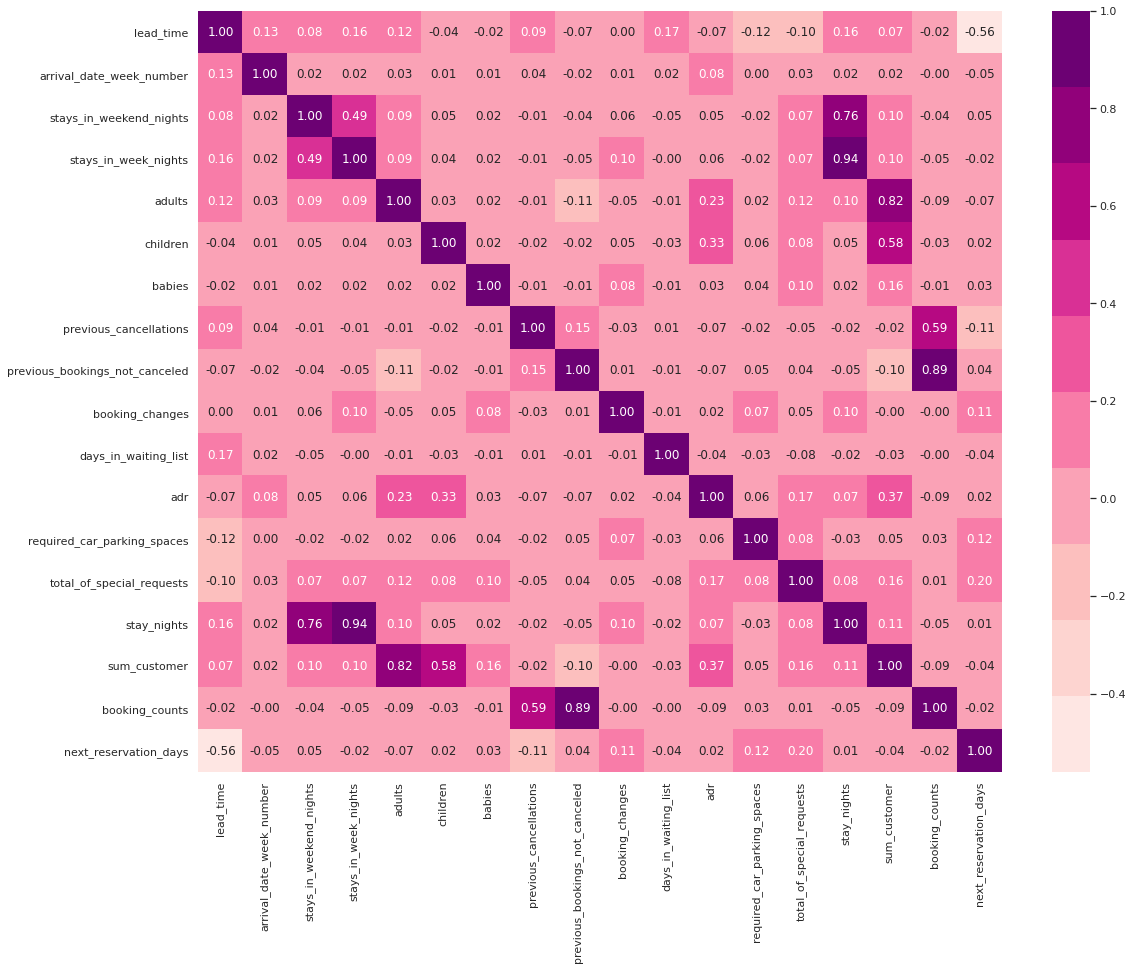

In [ ]:
# Heatmap
sns.set(rc={'figure.figsize':(18,14)})
colors = sns.color_palette("RdPu", 10)

heatmap = sns.heatmap(hotel.corr(),annot=True, fmt='.2f', cmap=colors)
heatmap

In [ ]:
# stays_in_weekend_nights, stays_in_week_nights, stay_nights 를 pca로 주성분 1만 사용하기
# next_reservation_days, lead_time 을 pca로 주성분 1만 사용하기 -> 상관계수 -0.56
# stays_in_weekend_nights, stays_in_week_nights 을 drop
# adults, children, babies 을 drop

hotel.head()
hotel.shape

(118898, 36)

In [ ]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'stay_nights',
       'sum_customer', 'booking_counts', 'arrival_status_date',
       'next_reservation_days', 'same_room'],
      dtype='object')

In [ ]:
# X와 y 생성

y=hotel['is_canceled'].copy()
features = ['hotel', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'meal',
       'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'stay_nights', 'sum_customer', 'booking_counts', 'next_reservation_days','same_room']

X = hotel[features].copy()
X.shape

(118898, 25)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118898 non-null  object 
 1   lead_time                    118898 non-null  int64  
 2   arrival_date_week_number     118898 non-null  int64  
 3   stays_in_weekend_nights      118898 non-null  int64  
 4   stays_in_week_nights         118898 non-null  int64  
 5   meal                         118898 non-null  object 
 6   country                      118898 non-null  object 
 7   market_segment               118898 non-null  object 
 8   distribution_channel         118898 non-null  object 
 9   is_repeated_guest            118898 non-null  object 
 10  reserved_room_type           118898 non-null  object 
 11  assigned_room_type           118898 non-null  object 
 12  booking_changes              118898 non-null  int64  
 13 

In [ ]:
## 1) pca
stay_features = ['stays_in_weekend_nights', 'stays_in_week_nights', 'stay_nights']
days_features = ['next_reservation_days', 'lead_time']

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
stay_features_pca = pca.fit_transform(X[stay_features])
days_features_pca = pca.fit_transform(X[days_features])
# stay_features_pca.shape

# pca 설명력 확인 92%
# cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
X['stay_features_pca'] = stay_features_pca
X['days_features_pca'] = days_features_pca
#X.head()

In [ ]:
## 2) 연속형 변수 drop - stays_pca
X.drop('stays_in_weekend_nights', axis=1, inplace=True)
X.drop('stays_in_week_nights', axis=1, inplace=True)

## 3) 연속형 변수 drop - days_pca
X.drop('lead_time', axis=1, inplace=True)
X.drop('next_reservation_days', axis=1, inplace=True)

## 4) 범주형 변수 drop - not for dummy
X.drop('country', axis=1, inplace=True)
X.drop('reserved_room_type', axis=1, inplace=True)
X.drop('assigned_room_type', axis=1, inplace=True)



In [ ]:
int_cols = [ f for f in X.columns if X.dtypes[ f ] != "object"]
obj_cols = [ f for f in X.columns if X.dtypes[ f ] == "object"]

In [ ]:
'''
# pca한거 빼고 연속형 변수
int_notpca_cols = ['arrival_date_week_number', 'booking_changes', 'days_in_waiting_list',
 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'stay_nights',
 'sum_customer', 'booking_counts']

 # 스케일러로 값 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hotel[int_cols].values)
'''

"\n# pca한거 빼고 연속형 변수\nint_notpca_cols = ['arrival_date_week_number', 'booking_changes', 'days_in_waiting_list',\n 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'stay_nights',\n 'sum_customer', 'booking_counts']\n\n # 스케일러로 값 변환\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(hotel[int_cols].values)\n"

In [ ]:
obj_cols

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'same_room']

In [ ]:
X['reservation_status'].value_counts()

Check-Out    74745
Canceled     42950
No-Show       1203
Name: reservation_status, dtype: int64

##### 변수 선택

In [ ]:
## 5) 변수 영향력 도출 - xgb
# 더미변수 생성
X_dummy = pd.get_dummies(X)

xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.2, random_state=42)
xgb_clf.fit(X_dummy, y)

## 변수중요도
feature_importance=pd.DataFrame()
feature_importance["feature"]=X_dummy.columns
feature_importance["importance"]=xgb_clf.feature_importances_

feature_importance.sort_values(by="importance",ascending=False).head(10)

,feature,importance
40,reservation_status_Check-Out,9.999966e-01
10,days_features_pca,3.257482e-06
3,adr,1.527894e-07
0,arrival_date_week_number,0.000000e+00
33,deposit_type_Non Refund,0.000000e+00
25,distribution_channel_Corporate,0.000000e+00
26,distribution_channel_Direct,0.000000e+00
27,distribution_channel_GDS,0.000000e+00
28,distribution_channel_TA/TO,0.000000e+00
29,distribution_channel_Undefined,0.000000e+00


In [ ]:
# reservation_status_Check-Out vs is_canceled 두 변수간의 관계는?
a = {'checkout':X_dummy['reservation_status_Check-Out'], 'y':hotel['is_canceled']}

In [ ]:
from pandas import DataFrame
a_df = DataFrame(a)
# print(a_df)
a_df['checkout']=a_df['checkout'].astype('int')
a_df['y'] = a_df['y'].astype('int')

a_df['relation'] = a_df['checkout']-a_df['y']
#print(a_df)
print('checkoutsum :', a_df['checkout'].sum())
print('relationsum :' ,a_df['relation'].sum())


checkoutsum : 74745
relationsum : 30592


In [ ]:
# reservation_status_Check-Out 얘때문에 정확도 1나와서 제거
xgb={'days_features_pca':X_dummy['days_features_pca'], 'adr':X_dummy['adr'],'is_canceled': hotel['is_canceled']}
from pandas import DataFrame

xgb_df = DataFrame(xgb)

In [ ]:
## 6) 변수 영향력 도출 - lgbm
lgb_clf=LGBMClassifier(max_depth=5, n_estimators=100,
    learning_rate=0.2, random_state=42)
lgb_clf.fit(X_dummy,y)

## 변수중요도
feature_importance=pd.DataFrame()
feature_importance["feature"]=X_dummy.columns
feature_importance["importance"]=lgb_clf.feature_importances_

feature_importance.sort_values(by="importance",ascending=False).head(10)

,feature,importance
0,arrival_date_week_number,228
3,adr,219
40,reservation_status_Check-Out,86
2,days_in_waiting_list,54
10,days_features_pca,41
1,booking_changes,26
6,stay_nights,6
8,booking_counts,2
9,stay_features_pca,2
33,deposit_type_Non Refund,1


In [ ]:
lgbm={'arrival_date_week_number':X_dummy['arrival_date_week_number'], 'adr':X_dummy['adr'],
      'days_in_waiting_list':X_dummy['days_in_waiting_list'],
      'days_features_pca':X_dummy['days_features_pca'],'booking_changes':X_dummy['booking_changes'],
      'is_canceled': hotel['is_canceled']}
lgbm_df = DataFrame(lgbm)

In [ ]:
## 7) 변수 영향력 도출 - RF

rf_clf=RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rf_clf.fit(X_dummy,y)

## 변수중요도
feature_importance=pd.DataFrame()
feature_importance["feature"]=X_dummy.columns
feature_importance["importance"]=rf_clf.feature_importances_
feature_importance.sort_values(by="importance",ascending=False).head(10)

,feature,importance
40,reservation_status_Check-Out,0.405550
39,reservation_status_Canceled,0.382385
32,deposit_type_No Deposit,0.054018
33,deposit_type_Non Refund,0.052626
10,days_features_pca,0.033381
5,total_of_special_requests,0.010496
42,same_room_0,0.009974
41,reservation_status_No-Show,0.008944
22,market_segment_Groups,0.007523
43,same_room_1,0.006393


In [ ]:
rf={'reservation_status_Canceled':X_dummy['reservation_status_Canceled'],
      'deposit_type_No Deposit':X_dummy['deposit_type_No Deposit'], 'deposit_type_Non Refund':X_dummy['deposit_type_Non Refund'],
      'days_features_pca':X_dummy['days_features_pca'],'total_of_special_requests':X_dummy['total_of_special_requests'],
    'is_canceled': hotel['is_canceled']}
rf_df = DataFrame(rf)

In [ ]:
## 8) 변수 영향력 도출 - RFE (recursive feature elimination), Backward 방식
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select = 7)
select.fit(X_dummy, y)

feature_importance_rfe = pd.DataFrame(zip(X_dummy.columns.values, select.get_support()))
feature_importance_rfe.columns = ['feature', 'importance']

feature_importance_rfe.sort_values(by="importance", ascending=False).head(5)

,feature,importance
43,same_room_1,True
41,reservation_status_No-Show,True
40,reservation_status_Check-Out,True
39,reservation_status_Canceled,True
10,days_features_pca,True


In [ ]:
rfe={'same_room_1':X_dummy['same_room_1'],'reservation_status_No-Show':X_dummy['reservation_status_No-Show'],
     'reservation_status_Canceled':X_dummy['reservation_status_Canceled'],
     'days_features_pca':X_dummy['days_features_pca'],'is_canceled': hotel['is_canceled']}
rfe_df = DataFrame(rfe)

In [ ]:
print(xgb_df.columns)
print(lgbm_df.columns)
print(rf_df.columns)
print(rfe_df.columns)

Index(['days_features_pca', 'adr', 'is_canceled'], dtype='object')
Index(['arrival_date_week_number', 'adr', 'days_in_waiting_list',
       'days_features_pca', 'booking_changes', 'is_canceled'],
      dtype='object')
Index(['reservation_status_Canceled', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'days_features_pca',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')
Index(['same_room_1', 'reservation_status_No-Show',
       'reservation_status_Canceled', 'days_features_pca', 'is_canceled'],
      dtype='object')


In [ ]:
selection ={'days_features_pca':X_dummy['days_features_pca'],
            'adr':X_dummy['adr'], 'arrival_date_week_number':X_dummy['arrival_date_week_number'],
           'days_in_waiting_list':X_dummy['days_in_waiting_list'], 'booking_changes':X_dummy['booking_changes'],
            'reservation_status_Canceled':X_dummy['reservation_status_Canceled'],'deposit_type_No Deposit':X_dummy['deposit_type_No Deposit'],
            'deposit_type_Non Refund':X_dummy['deposit_type_Non Refund'],'total_of_special_requests':X_dummy['total_of_special_requests'],
            'same_room_1':X_dummy['same_room_1'], 'reservation_status_No-Show':X_dummy['reservation_status_No-Show'],
            'is_canceled': hotel['is_canceled']}
selection_df = DataFrame(selection)

In [ ]:
# 변수선택으로 5가지 데이터셋 생성
# xgb_df, lgbm_df, rf_df, rfe_df, selection_df
# selection_df는 4가지 변수선택 방법으로 나온 변수들 모두 합친 데이터셋

### Modeling

*   LogisticRegression
*   RandomForestClassifier
*   LGBM






##### xgb_df 데이터셋

In [ ]:
# data split
xgb_df.columns
y_xgb = xgb_df['is_canceled']
X_xgb = xgb_df[['days_features_pca', 'adr']]

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [ ]:
## LogisicRegression
# 모델 정확도 확인
logrg = LogisticRegression(random_state=42)
logrg.fit(X_xgb_train, y_xgb_train)
# train score 확인
print('Train data Score : %.2f' % logrg.score(X_xgb_train, y_xgb_train))

# test score 확인
logrg.fit(X_xgb_test, y_xgb_test)
print('Test data Score : %.2f ' % logrg.score(X_xgb_test, y_xgb_test))

# 성능평가
y_pred=logrg.predict(X_xgb_test)
print("Accuracy : ", accuracy_score(y_xgb_test, y_xgb_test))
print(classification_report(y_xgb_test, y_pred))

Train data Score : 0.71
Test data Score : 0.70 
Accuracy :  1.0
              precision    recall  f1-score   support

           0       0.72      0.87      0.79     14851
           1       0.67      0.43      0.52      8929

    accuracy                           0.70     23780
   macro avg       0.69      0.65      0.65     23780
weighted avg       0.70      0.70      0.69     23780



In [ ]:
## RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 최적 파라미터 찾기
param = {'max_depth':[5,6,7,8,9,10],
         'n_estimators':[300,400,500]}
grid = GridSearchCV(rf, param_grid=param,cv=3)
grid.fit(X_xgb_train,y_xgb_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_xgb_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_xgb_test, y_pred)))
print(classification_report(y_xgb_test, y_pred))

최적 파라미터 :  {'max_depth': 10, 'n_estimators': 300}
테스트 데이트셋 정확도 : 0.7577
              precision    recall  f1-score   support

           0       0.74      0.94      0.83     14851
           1       0.83      0.45      0.58      8929

    accuracy                           0.76     23780
   macro avg       0.78      0.70      0.71     23780
weighted avg       0.77      0.76      0.74     23780



In [ ]:
## LGBM
lgb = LGBMClassifier(n_estimators=100,random_state=42)

# 최적 파라미터 찾기
param = {'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
         'n_estimators':[200,300,400,500]}
grid = GridSearchCV(lgb, param_grid=param,cv=3)
grid.fit(X_xgb_train,y_xgb_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_xgb_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_xgb_test, y_pred)))
print(classification_report(y_xgb_test, y_pred))

최적 파라미터 :  {'learning_rate': 0.2, 'n_estimators': 500}
테스트 데이트셋 정확도 : 0.7990
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14851
           1       0.82      0.60      0.69      8929

    accuracy                           0.80     23780
   macro avg       0.81      0.76      0.77     23780
weighted avg       0.80      0.80      0.79     23780



##### lgbm_df 데이터셋

In [ ]:
# data split
lgbm_df.columns
y_lgbm = lgbm_df['is_canceled']
X_lgbm = lgbm_df[['arrival_date_week_number', 'adr', 'days_in_waiting_list',
       'days_features_pca', 'booking_changes']]

X_lgbm_train, X_lgbm_test, y_lgbm_train, y_lgbm_test = train_test_split(X_lgbm, y_lgbm, test_size=0.2, random_state=42)

In [ ]:
## LogisicRegression
# 모델 정확도 확인
logrg = LogisticRegression(random_state=42)
logrg.fit(X_lgbm_train, y_lgbm_train)
# train score 확인
print('Train data Score : %.2f' % logrg.score(X_lgbm_train, y_lgbm_train))

# test score 확인
logrg.fit(X_lgbm_test, y_lgbm_test)
print('Test data Score : %.2f ' % logrg.score(X_lgbm_test, y_lgbm_test))

# 성능평가
y_pred=logrg.predict(X_lgbm_test)
print("Accuracy : ", accuracy_score(y_lgbm_test, y_pred))
print(classification_report(y_lgbm_test, y_pred))

Train data Score : 0.72
Test data Score : 0.71 
Accuracy :  0.714592094196804
              precision    recall  f1-score   support

           0       0.73      0.87      0.79     14851
           1       0.68      0.45      0.54      8929

    accuracy                           0.71     23780
   macro avg       0.70      0.66      0.67     23780
weighted avg       0.71      0.71      0.70     23780



In [ ]:
## RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 최적 파라미터 찾기
param = {'max_depth':[5,6,7,8,9,10],
         'n_estimators':[300,400,500]}
grid = GridSearchCV(rf, param_grid=param,cv=3)
grid.fit(X_lgbm_train,y_lgbm_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_lgbm_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_lgbm_test, y_pred)))
print(classification_report(y_lgbm_test, y_pred))

최적 파라미터 :  {'max_depth': 10, 'n_estimators': 300}
테스트 데이트셋 정확도 : 0.7758
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     14851
           1       0.83      0.51      0.63      8929

    accuracy                           0.78     23780
   macro avg       0.79      0.72      0.73     23780
weighted avg       0.79      0.78      0.76     23780



In [ ]:
## LGBM
lgb = LGBMClassifier(n_estimators=100,random_state=42)

# 최적 파라미터 찾기
param = {'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
         'n_estimators':[200,300,400,500]}
grid = GridSearchCV(lgb, param_grid=param,cv=3)
grid.fit(X_lgbm_train,y_lgbm_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_lgbm_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_lgbm_test, y_pred)))
print(classification_report(y_lgbm_test, y_pred))

최적 파라미터 :  {'learning_rate': 0.3, 'n_estimators': 500}
테스트 데이트셋 정확도 : 0.8324
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     14851
           1       0.84      0.68      0.75      8929

    accuracy                           0.83     23780
   macro avg       0.84      0.80      0.81     23780
weighted avg       0.83      0.83      0.83     23780



##### rf_df 데이터셋

In [ ]:
# data split
# 'reservation_status_Canceled' 이 변수 때문에 과적합 => 빼고 진행
rf_df.columns
y_rf = rf_df['is_canceled']
X_rf = rf_df[['deposit_type_No Deposit', 'deposit_type_Non Refund','days_features_pca', 'total_of_special_requests']]

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [ ]:
## LogisicRegression
# 모델 정확도 확인
logrg = LogisticRegression(random_state=42)
logrg.fit(X_rf_train, y_rf_train)
# train score 확인
print('Train data Score : %.2f' % logrg.score(X_rf_train, y_rf_train))

# test score 확인
logrg.fit(X_rf_test, y_rf_test)
print('Test data Score : %.2f ' % logrg.score(X_rf_test, y_rf_test))

# 성능평가
y_pred=logrg.predict(X_rf_test)
print("Accuracy : ", accuracy_score(y_rf_test,y_pred))
print(classification_report(y_rf_test, y_pred))

Train data Score : 0.76
Test data Score : 0.76 
Accuracy :  0.761354079058032
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     14851
           1       0.83      0.46      0.59      8929

    accuracy                           0.76     23780
   macro avg       0.79      0.70      0.71     23780
weighted avg       0.78      0.76      0.74     23780



In [ ]:
## RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 최적 파라미터 찾기
param = {'max_depth':[3,5,7],
         'n_estimators':[100,300,500]}
grid = GridSearchCV(rf, param_grid=param,cv=3)
grid.fit(X_rf_train,y_rf_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_rf_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_rf_test, y_pred)))
print(classification_report(y_rf_test, y_pred))

최적 파라미터 :  {'max_depth': 10, 'n_estimators': 300}
테스트 데이트셋 정확도 : 0.7846
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     14851
           1       0.90      0.48      0.63      8929

    accuracy                           0.78     23780
   macro avg       0.83      0.72      0.74     23780
weighted avg       0.81      0.78      0.77     23780



In [ ]:
## LGBM
lgb = LGBMClassifier(n_estimators=100,random_state=42)

# 최적 파라미터 찾기
param = {'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
         'n_estimators':[200,300,400,500]}
grid = GridSearchCV(lgb, param_grid=param,cv=3)
grid.fit(X_rf_train,y_rf_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_rf_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_rf_test, y_pred)))
print(classification_report(y_rf_test, y_pred))

최적 파라미터 :  {'learning_rate': 0.05, 'n_estimators': 300}
테스트 데이트셋 정확도 : 0.7731
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     14851
           1       0.85      0.48      0.61      8929

    accuracy                           0.77     23780
   macro avg       0.80      0.71      0.73     23780
weighted avg       0.79      0.77      0.75     23780



##### rfe_df 데이터셋

In [ ]:
# data split
rfe_df.columns
y_rfe = rfe_df['is_canceled']
X_rfe = rfe_df[['same_room_1', 'reservation_status_No-Show','days_features_pca']]

X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=42)

In [ ]:
## LogisicRegression
# 모델 정확도 확인
logrg = LogisticRegression(random_state=42)
logrg.fit(X_rfe_train, y_rfe_train)
# train score 확인
print('Train data Score : %.2f' % logrg.score(X_rfe_train, y_rfe_train))

# test score 확인
logrg.fit(X_rfe_test, y_rfe_test)
print('Test data Score : %.2f ' % logrg.score(X_rfe_test, y_rfe_test))

# 성능평가
y_pred=logrg.predict(X_rfe_test)
print("Accuracy : ", accuracy_score(y_rfe_test, y_pred))
print(classification_report(y_rfe_test, y_pred))

Train data Score : 0.72
Test data Score : 0.72 
Accuracy :  0.7207737594617325
              precision    recall  f1-score   support

           0       0.73      0.87      0.80     14851
           1       0.69      0.47      0.56      8929

    accuracy                           0.72     23780
   macro avg       0.71      0.67      0.68     23780
weighted avg       0.72      0.72      0.71     23780



In [ ]:
## RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 최적 파라미터 찾기
param = {'max_depth':[5,6,7,8,9,10],
         'n_estimators':[100,300,500]}
grid = GridSearchCV(rf, param_grid=param,cv=3)
grid.fit(X_rfe_train,y_rfe_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_rfe_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_rfe_test, y_pred)))
print(classification_report(y_rfe_test, y_pred))

최적 파라미터 :  {'max_depth': 10, 'n_estimators': 500}
테스트 데이트셋 정확도 : 0.7526
              precision    recall  f1-score   support

           0       0.74      0.93      0.82     14851
           1       0.80      0.45      0.58      8929

    accuracy                           0.75     23780
   macro avg       0.77      0.69      0.70     23780
weighted avg       0.76      0.75      0.73     23780



In [ ]:
## LGBM
lgb = LGBMClassifier(n_estimators=100,random_state=42)

# 최적 파라미터 찾기
param = {'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
         'n_estimators':[200,300,400,500]}
grid = GridSearchCV(lgb, param_grid=param,cv=3)
grid.fit(X_rfe_train,y_rfe_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_rfe_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_rfe_test, y_pred)))
print(classification_report(y_rfe_test, y_pred))

최적 파라미터 :  {'learning_rate': 0.05, 'n_estimators': 500}
테스트 데이트셋 정확도 : 0.7391
              precision    recall  f1-score   support

           0       0.75      0.86      0.81     14851
           1       0.70      0.53      0.60      8929

    accuracy                           0.74     23780
   macro avg       0.73      0.70      0.70     23780
weighted avg       0.73      0.74      0.73     23780



##### selection_df 데이터셋


In [ ]:
# data split
selection_df.columns
y_sel = selection_df['is_canceled']
X_sel = selection_df[[ 'days_features_pca', 'adr',
       'arrival_date_week_number', 'days_in_waiting_list', 'booking_changes',
      'deposit_type_No Deposit','deposit_type_Non Refund',
      'total_of_special_requests', 'same_room_1','reservation_status_No-Show']]

X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y_sel, test_size=0.2, random_state=42)

In [ ]:
## LogisicRegression
# 모델 정확도 확인
logrg = LogisticRegression(random_state=5)
logrg.fit(X_sel_train, y_sel_train)
# train score 확인
print('Train data Score : %.2f' % logrg.score(X_sel_train, y_sel_train))

# test score 확인
logrg.fit(X_sel_test, y_sel_test)
print('Test data Score : %.2f ' % logrg.score(X_sel_test, y_sel_test))

# 성능평가
y_pred=logrg.predict(X_sel_test)
print("Accuracy : ", accuracy_score(y_sel_test,y_pred))
print(classification_report(y_sel_test, y_pred))

Train data Score : 0.78
Test data Score : 0.78 
Accuracy :  0.7822960470984021
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     14851
           1       0.82      0.54      0.65      8929

    accuracy                           0.78     23780
   macro avg       0.79      0.73      0.75     23780
weighted avg       0.79      0.78      0.77     23780



In [ ]:
## RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 최적 파라미터 찾기
param = {'max_depth':[3,5,7,],
         'n_estimators':[300,400,500]}
grid = GridSearchCV(rf, param_grid=param,cv=3)
grid.fit(X_sel_train,y_sel_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_sel_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_sel_test, y_pred)))
print(classification_report(y_sel_test, y_pred))

최적 파라미터 :  {'max_depth': 10, 'n_estimators': 300}
테스트 데이트셋 정확도 : 0.8109
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     14851
           1       0.85      0.60      0.71      8929

    accuracy                           0.81     23780
   macro avg       0.82      0.77      0.78     23780
weighted avg       0.82      0.81      0.80     23780



In [ ]:
## LGBM
lgb = LGBMClassifier(n_estimators=100,random_state=42)

# 최적 파라미터 찾기
param = {'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
         'n_estimators':[200,300,400,500]}
grid = GridSearchCV(lgb, param_grid=param,cv=3)
grid.fit(X_sel_train,y_sel_train)
grid.best_params_
print('최적 파라미터 : ', grid.best_params_)

# 성능 평가
estimator = grid.best_estimator_
y_pred = estimator.predict(X_sel_test)
print('테스트 데이트셋 정확도 : {0:.4f}'.format(accuracy_score(y_sel_test, y_pred)))
print(classification_report(y_sel_test, y_pred))

최적 파라미터 :  {'learning_rate': 0.3, 'n_estimators': 500}
테스트 데이트셋 정확도 : 0.8579
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14851
           1       0.86      0.74      0.80      8929

    accuracy                           0.86     23780
   macro avg       0.86      0.84      0.84     23780
weighted avg       0.86      0.86      0.86     23780

